<a href="https://colab.research.google.com/github/caltunay/applied_data_science_capstone_1/blob/master/monday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
cd root/.kaggle

/root/.kaggle


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"caltunay","key":"8f5c775f9cd3c8c66339aab1ca827573"}'}

In [5]:
!kaggle datasets download -d anthonypino/melbourne-housing-market

  0% 0.00/2.26M [00:00<?, ?B/s]
100% 2.26M/2.26M [00:00<00:00, 74.3MB/s]


In [7]:
!unzip melbourne-housing-market.zip -d /content

Archive:  melbourne-housing-market.zip
  inflating: /content/Melbourne_housing_FULL.csv  
  inflating: /content/MELBOURNE_HOUSE_PRICES_LESS.csv  


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


path = 'content/MELBOURNE_HOUSE_PRICES_LESS.csv'

df = pd.read_csv(path)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [52]:
df[['Postcode','Price','Suburb']].isnull().sum()

Postcode        0
Price       14590
Suburb          0
dtype: int64

In [0]:
from sklearn.impute import SimpleImputer

In [54]:
df_nona = df.dropna()

df_nona.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [42]:
df_nona['Price'].min()

85000.0

In [56]:
avg_prices = df_nona.groupby('Postcode')[['Price']].mean()
avg_prices.head()

,Price
Postcode,
3000,7.731029e+05
3002,1.409505e+06
3003,1.041723e+06
3006,6.520588e+05
3008,6.954444e+05


In [0]:
df['Price2'] = df.groupby(['Postcode','Rooms'])['Price'].apply(lambda x: x.fillna(x.mean()))

In [88]:

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Price2
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,1490000.0
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,1220000.0
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,1420000.0
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,1515000.0
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,670000.0


**Clean data after here**

In [210]:
df_cols = 'Suburb Postcode Price2'.split()
df_clean = df[df_cols]
df_clean.head(2)

,Suburb,Postcode,Price2
0,Abbotsford,3067,1490000.0
1,Abbotsford,3067,1220000.0


In [211]:
melb_venues = pd.read_csv('content/melb_venues.csv', index_col = 0)
melb_venues.head(2)
# ls -l

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bellfield,-37.735707,145.049696,Latitude,-37.733320,145.049530,Recreation Center
1,Bellfield,-37.735707,145.049696,Waterdale Road Foodworks,-37.736362,145.048651,Convenience Store


In [0]:
eda = melb_venues.groupby('Neighborhood')['Venue'].count().sort_values(ascending=False).head(50)
eda = pd.DataFrame(eda).reset_index().rename({'Venue':'Venue Count'},axis=1)

In [0]:
import seaborn as sns

In [0]:
house_prices = df_clean.groupby('Suburb')[['Price2']].mean().reset_index()

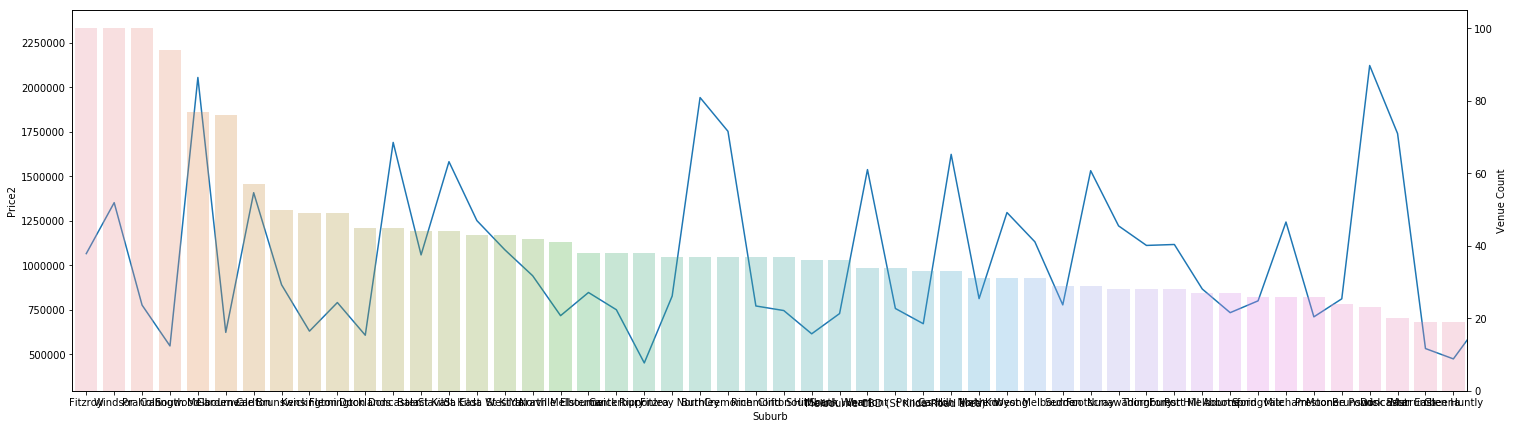

In [136]:
plt.figure(figsize=(25,7))

ax1 = sns.lineplot(data = house_prices, x = 'Suburb', y = 'Price2')
ax2 = ax1.twinx()
ax2.grid(False)
plt.xticks(rotation = 90)
sns.barplot(data = eda, x = 'Neighborhood', y = 'Venue Count', ax = ax2, alpha = .3)
# sns.despine(ax=ax2,bottom = True, right = True)
# plt.xticks(rotation = 90)

plt.show()

In [145]:
t2 = pd.merge(left = eda, right = house_prices, how = 'inner', left_on = 'Neighborhood', right_on = 'Suburb').drop('Suburb', axis =1 )
t2.head()

,Neighborhood,Venue Count,Price2
0,Fitzroy,100,1.303954e+06
1,Windsor,100,1.108837e+06
2,Prahran,100,1.167227e+06
3,Collingwood,94,9.268930e+05
4,South Melbourne,77,1.324086e+06


In [146]:
t2.corr()

,Venue Count,Price2
Venue Count,1.000000,0.016508
Price2,0.016508,1.000000


In [147]:
df_clean.head()

,Suburb,Postcode,Price2
0,Abbotsford,3067,1490000.0
1,Abbotsford,3067,1220000.0
2,Abbotsford,3067,1420000.0
3,Aberfeldie,3040,1515000.0
4,Airport West,3042,670000.0


In [150]:
melb_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bellfield,-37.735707,145.049696,Latitude,-37.733320,145.049530,Recreation Center
1,Bellfield,-37.735707,145.049696,Waterdale Road Foodworks,-37.736362,145.048651,Convenience Store
2,Bellfield,-37.735707,145.049696,Waterdale Fish & Chips,-37.736390,145.048500,Fish & Chips Shop
3,Bellfield,-37.735707,145.049696,Fowl Play Charcoal Chicken,-37.737430,145.046907,Fried Chicken Joint
4,Briar Hill,-37.704640,145.109652,WaterMARC,-37.704519,145.104846,Swim School


In [212]:
melb_venues_labels = pd.get_dummies(data=melb_venues['Venue Category'], drop_first = False)
melb_dummied = pd.merge(melb_venues.drop(labels=['Venue',	'Venue Latitude',	'Venue Longitude',	'Venue Category'], axis = 1), melb_venues_labels, left_index = True, right_index = True)
melb_dummied.head(2)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Workshop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Shop,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Bowling Green,Breakfast Spot,Brewery,...,Spanish Restaurant,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swim School,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Temple,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Volcano,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Xinjiang Restaurant,Yoga Studio,Yunnan Restaurant
0,Bellfield,-37.735707,145.049696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bellfield,-37.735707,145.049696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
melb_dummied = melb_dummied.groupby('Neighborhood').mean().reset_index()


In [215]:
melb_dummied.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Workshop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Shop,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Bowling Green,Breakfast Spot,Brewery,...,Spanish Restaurant,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swim School,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Temple,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Volcano,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Xinjiang Restaurant,Yoga Studio,Yunnan Restaurant
0,Abbotsford,-37.803555,144.995194,0.074074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,...,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.037037,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aberfeldie,-37.749436,144.919553,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.000000,...,0.0,0.0,0.0,0.0,0.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aintree,-34.873065,-56.267905,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Airport West,-37.723395,144.857632,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Albanvale,-37.740779,144.798206,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
house_prices['Price2'].min()

391970.97378277156

In [218]:
house_prices['Price2'].max()

2334422.4610093688

911087.2250856746


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


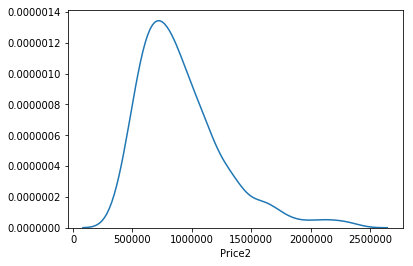

In [216]:
print(house_prices['Price2'].mean())
sns.distplot(house_prices['Price2'],hist=False)

In [0]:
bins = np.linspace(house_prices['Price2'].min(),house_prices['Price2'].max(),5)
labels = 'Low Mid-Low High-Low High'.split()

labeled_prices = pd.merge(house_prices, pd.cut(df_clean['Price2'], bins = bins, labels = labels, include_lowest = True), left_index = True, right_index = True)

labeled_prices.rename({'Price2_x':'Actual Mean',	'Price2_y':'Bin'},axis=1,inplace=True)

In [221]:
labeled_prices.head()

,Suburb,Actual Mean,Bin
0,Abbotsford,1.065107e+06,High-Low
1,Aberfeldie,1.351314e+06,Mid-Low
2,Airport West,7.760442e+05,High-Low
3,Albanvale,5.468430e+05,High-Low
4,Albert Park,2.054282e+06,Low


In [217]:
melb_grouped = melb_dummied.groupby('Neighborhood').mean().reset_index()
melb_grouped.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Workshop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Shop,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Bowling Green,Breakfast Spot,Brewery,...,Spanish Restaurant,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swim School,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Temple,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Volcano,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Xinjiang Restaurant,Yoga Studio,Yunnan Restaurant
0,Abbotsford,-37.803555,144.995194,0.074074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,...,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.037037,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aberfeldie,-37.749436,144.919553,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.000000,...,0.0,0.0,0.0,0.0,0.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aintree,-34.873065,-56.267905,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Airport West,-37.723395,144.857632,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Albanvale,-37.740779,144.798206,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
all_data = pd.merge(left = melb_grouped, right = labeled_prices, left_on = 'Neighborhood', right_on = 'Suburb', how = 'inner')

In [232]:
all_data['Bin'].value_counts()

Low         130
Mid-Low      79
High-Low     61
High         27
Name: Bin, dtype: int64

In [0]:
to_drop = ['Neighborhood',	'Neighborhood Latitude',	'Neighborhood Longitude', 'Suburb',	'Actual Mean',	'Bin']

x = all_data.drop(to_drop, axis = 1).values

In [0]:
from sklearn.cluster import KMeans

In [0]:
n_distortions = []
K = range(1,50)

for k in K:
  kmeans = KMeans(n_clusters = k).fit(x)
  n_distortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

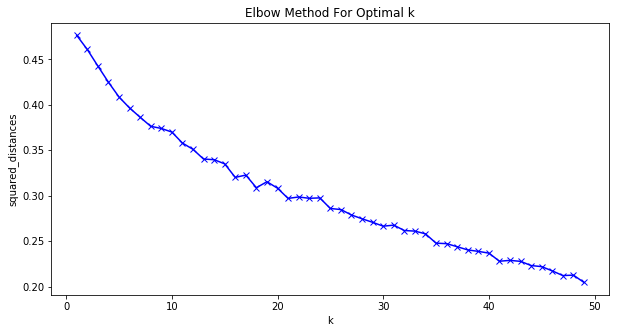

In [251]:
plt.figure(figsize=(10,5))
plt.plot(K, n_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#  Choose 8 because you dont want to overfit, i have below 350 suburbs and too many clusters will eventually going to seperate by each column and there's a slight elbow thereBB

In [261]:
kmeans_opt = KMeans(n_clusters = 8, random_state = 42)
model = kmeans_opt.fit(x)

all_data.insert(0,'Cluster Labels',model.labels_)
all_data.head()

,Cluster Labels,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Workshop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Shop,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Bowling Green,Breakfast Spot,...,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swim School,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Temple,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Volcano,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Xinjiang Restaurant,Yoga Studio,Yunnan Restaurant,Suburb,Actual Mean,Bin
0,1,Abbotsford,-37.803555,144.995194,0.074074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.037037,0.0,0.037037,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abbotsford,1.065107e+06,High-Low
1,1,Aberfeldie,-37.749436,144.919553,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.0,0.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aberfeldie,1.351314e+06,Mid-Low
2,0,Airport West,-37.723395,144.857632,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Airport West,7.760442e+05,High-Low
3,1,Albanvale,-37.740779,144.798206,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Albanvale,5.468430e+05,High-Low
4,1,Albert Park,-37.845448,144.958343,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Albert Park,2.054282e+06,Low


In [273]:
# create map on melbourne
latitude = -37.803555 
longitude = 144.995194
map_clustered = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
k = 8
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(all_data['Neighborhood Latitude'], all_data['Neighborhood Longitude'], all_data['Neighborhood'], all_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clustered)
       
map_clustered

In [0]:
short_data = all_data[['Cluster Labels','Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Bin']]

In [267]:
short_data[short_data.Neighborhood == 'Brunswick']

,Cluster Labels,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Bin
47,1,Brunswick,-37.767717,144.959464,Mid-Low


In [271]:
advice = short_data[(short_data['Cluster Labels'] == 1) & (short_data['Bin'] == 'Mid-Low')]
advice.head()

,Cluster Labels,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Bin
1,1,Aberfeldie,-37.749436,144.919553,Mid-Low
21,1,Balwyn,-37.809190,145.080935,Mid-Low
22,1,Balwyn North,-37.792931,145.075211,Mid-Low
32,1,Berwick,-38.065802,145.340262,Mid-Low
37,1,Bonbeach,-38.038108,145.114415,Mid-Low


In [0]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors


In [272]:
# create map on melbourne
latitude = -37.803555 
longitude = 144.995194
map_clustered = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
k = 8
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(advice['Neighborhood Latitude'], advice['Neighborhood Longitude'], advice['Neighborhood'], advice['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clustered)
       
map_clustered


# Pick the one with least coffee house from these suburbs

In [0]:
count = melb_venues.groupby(['Neighborhood','Venue Category'])[['Venue']].count().reset_index()

cafe_count = count[count['Venue Category'] == 'Café']

In [0]:
cafe_count = cafe_count.reset_index(drop=True)

In [0]:
advice = advice.reset_index(drop = True)

In [0]:
counted_advice = pd.merge(left = advice, right = cafe_count, left_on = 'Neighborhood', right_on = 'Neighborhood', how = 'left')

In [0]:
counted_advice.dropna(inplace=True)

In [0]:
suggestions = counted_advice.sort_values(by='Venue').head()

In [299]:
# create map on melbourne
latitude = -37.803555 
longitude = 144.995194
map_clustered = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(suggestions['Neighborhood Latitude'], suggestions['Neighborhood Longitude'], suggestions['Neighborhood'], suggestions['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clustered)
       
map_clustered
